In [1]:
import seaborn as sns
from scipy import stats
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Testing the implementation of relative PRIM using the lake model run

In [2]:
from ema_workbench import load_results
results = load_results(r'10k_scenarios.tar.gz')
experiments, outcomes = results
experiments.head()

C:\Users\jafino\Anaconda3\envs\cocitip\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\jafino\Anaconda3\envs\cocitip\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


,b,delta,mean,q,stdev,scenario,policy,model
0,0.147181,0.948084,0.042940,2.120977,0.004334,0,None,lakeproblem
1,0.125658,0.944953,0.034463,3.325194,0.004574,1,None,lakeproblem
2,0.256255,0.946291,0.010319,3.499250,0.003165,2,None,lakeproblem
3,0.214926,0.985462,0.020252,3.614743,0.002246,3,None,lakeproblem
4,0.230174,0.989367,0.038301,4.465881,0.004954,4,None,lakeproblem


C:\Users\jafino\Anaconda3\envs\cocitip\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


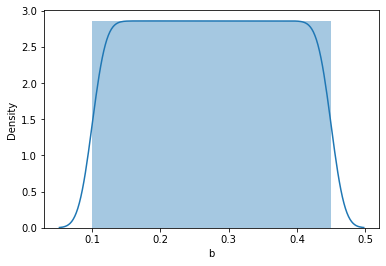

C:\Users\jafino\Anaconda3\envs\cocitip\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


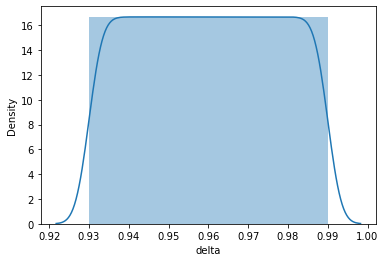

C:\Users\jafino\Anaconda3\envs\cocitip\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


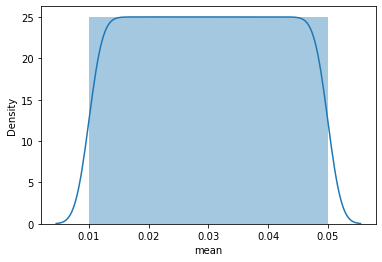

C:\Users\jafino\Anaconda3\envs\cocitip\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


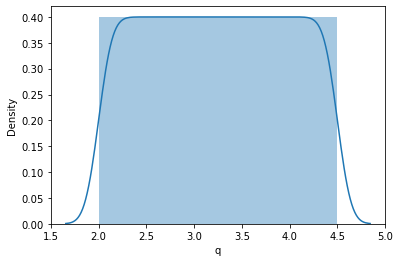

In [3]:
sns.distplot(experiments['b'])
plt.show()
sns.distplot(experiments['delta'])
plt.show()
sns.distplot(experiments['mean'])
plt.show()
sns.distplot(experiments['q'])
plt.show()

### Generate arbitrary relative likelihood for each uncertain variable

In [4]:
mu = 2
std = 1
x = 2
print(stats.norm.pdf(x, mu, std))
print(stats.norm.cdf(x, mu, std))

0.3989422804014327
0.5


In [5]:
mu_list = {'b': 0.275, 'delta': 0.97, 'mean': 0.03, 'q': 3.125}
std_list = {'b': 0.2, 'delta': 0.02, 'mean': 0.02, 'q': 0.2}

for var in ['b', 'q']:
    experiments[var+'_likelihood'] = stats.norm.pdf(experiments[var], mu_list[var], std_list[var])
    experiments[var+'_likelihood'] /= np.max(experiments[var+'_likelihood'])
#     experiments[var+'_likelihood'] /= np.sum(experiments[var+'_likelihood'])
#     print(var, np.sum(experiments[var+'_likelihood']), np.max(experiments[var+'_likelihood']))

In [6]:
experiments

,b,delta,mean,q,stdev,scenario,policy,model,b_likelihood,q_likelihood
0,0.147181,0.948084,0.042940,2.120977,0.004334,0,None,lakeproblem,0.815282,3.369365e-06
1,0.125658,0.944953,0.034463,3.325194,0.004574,1,None,lakeproblem,0.756699,6.059411e-01
2,0.256255,0.946291,0.010319,3.499250,0.003165,2,None,lakeproblem,0.995618,1.736364e-01
3,0.214926,0.985462,0.020252,3.614743,0.002246,3,None,lakeproblem,0.955891,4.988137e-02
4,0.230174,0.989367,0.038301,4.465881,0.004954,4,None,lakeproblem,0.975196,1.735573e-10
...,...,...,...,...,...,...,...,...,...,...
9995,0.265693,0.985734,0.013998,3.580786,0.002944,9995,None,lakeproblem,0.998918,7.451423e-02
9996,0.360039,0.983603,0.031615,2.610700,0.004758,9996,None,lakeproblem,0.913570,3.665113e-02
9997,0.314175,0.934531,0.038166,4.280562,0.004198,9997,None,lakeproblem,0.980999,5.635793e-08
9998,0.246074,0.939239,0.027376,4.443366,0.002103,9998,None,lakeproblem,0.989595,3.668386e-10


In [7]:
experiments['rel_prob'] = 1
for col in experiments.columns:
    if 'likelihood' in col:
        experiments['rel_prob'] *= experiments[col]
        
experiments['rel_prob'] = experiments['rel_prob'] / np.mean(experiments['rel_prob'])
np.sum(experiments['rel_prob']), len(experiments)

(10000.0, 10000)

In [8]:
experiments

,b,delta,mean,q,stdev,scenario,policy,model,b_likelihood,q_likelihood,rel_prob
0,0.147181,0.948084,0.042940,2.120977,0.004334,0,None,lakeproblem,0.815282,3.369365e-06,1.549538e-05
1,0.125658,0.944953,0.034463,3.325194,0.004574,1,None,lakeproblem,0.756699,6.059411e-01,2.586427e+00
2,0.256255,0.946291,0.010319,3.499250,0.003165,2,None,lakeproblem,0.995618,1.736364e-01,9.751685e-01
3,0.214926,0.985462,0.020252,3.614743,0.002246,3,None,lakeproblem,0.955891,4.988137e-02,2.689634e-01
4,0.230174,0.989367,0.038301,4.465881,0.004954,4,None,lakeproblem,0.975196,1.735573e-10,9.547313e-10
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.265693,0.985734,0.013998,3.580786,0.002944,9995,None,lakeproblem,0.998918,7.451423e-02,4.198705e-01
9996,0.360039,0.983603,0.031615,2.610700,0.004758,9996,None,lakeproblem,0.913570,3.665113e-02,1.888755e-01
9997,0.314175,0.934531,0.038166,4.280562,0.004198,9997,None,lakeproblem,0.980999,5.635793e-08,3.118675e-07
9998,0.246074,0.939239,0.027376,4.443366,0.002103,9998,None,lakeproblem,0.989595,3.668386e-10,2.047760e-09


### Now run both modified (dummy) PRIM and normal PRIM

In [9]:
from ema_workbench_l.analysis import relative_prim, prim
from ema_workbench_l import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

D:\GitHub\likelihoodPRIM\ema_workbench_l\em_framework\salib_samplers.py:17: ImportWarning: SALib samplers not available
  warnings.warn("SALib samplers not available", ImportWarning)
D:\GitHub\likelihoodPRIM\ema_workbench_l\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
D:\GitHub\likelihoodPRIM\ema_workbench_l\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
D:\GitHub\likelihoodPRIM\ema_workbench_l\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "
D:\GitHub\likelihoodPRIM\ema_workbench_l\analysis\relative_prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


<Logger EMA (DEBUG)>

Normal PRIM

In [10]:
x = experiments[['b', 'delta', 'mean', 'q']]
data = outcomes['reliability']
y = data < np.percentile(data, 15)

prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 1500 cases of interest
[MainProcess/INFO] mean: 0.9920318725099602, mass: 0.0502, coverage: 0.332, density: 0.9920318725099602 restricted_dimensions: 3


PRIM with non-binary y

In [11]:
prim_alg = relative_prim.RelativePrim(relative_likelihood=experiments['rel_prob'], x=x, y=y, threshold=0.2)
box2 = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 1026.7864449388944 cases of interest


1026.7864449388944


[MainProcess/INFO] mean: 0.6155381190034704, mass: 0.0502, coverage: 0.8900473411848269, density: 0.6155381190034704 restricted_dimensions: 3


### Compare coverage-density threshold

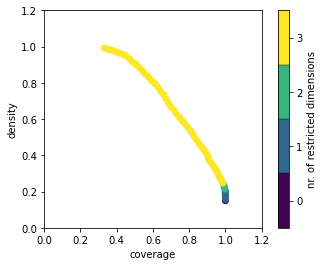

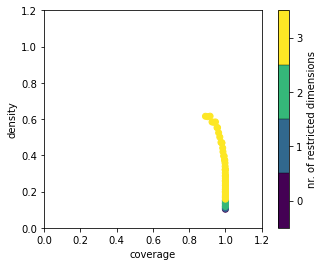

In [12]:
box1.show_tradeoff()
plt.show()
box2.show_tradeoff()
plt.show()

In [13]:
pt_1 = box1.peeling_trajectory
pt_2 = box2.peeling_trajectory
pt_1['box'] = 'box1_PRIM'
pt_2['box'] = 'box2_PRIM_likelihood'
box_combined = pt_1.append(pt_2)

(0.1, 1.02)

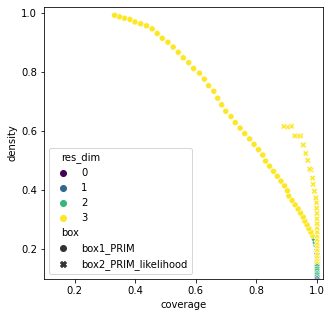

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x='coverage', y='density', hue='res_dim', data=box_combined, style='box', palette='viridis', ax=ax)
ax.set_ylim(0.1,1.02)
ax.set_xlim(0.1,1.02)

### Does the standard PRIM adequately capture relative likelihood information? To investigate this, we compare weighted density and coverage from each box from the normal PRIM run

In [17]:
experiments['y'] = y
total_coi = experiments.loc[experiments['y'], 'rel_prob'].sum()
print(experiments['y'].sum())

1500


In [24]:
box1.peeling_trajectory['weighted_coverage'] = 0
box1.peeling_trajectory['weighted_density'] = 0

for i in range(len(box1.box_lims)):
    if i > -1:
        all_vars = list(box1.qp[i])
        experiments_ = experiments.copy()
        for var in all_vars:
            upper_lim = box1.box_lims[i][var][1]
            lower_lim = box1.box_lims[i][var][0]
            experiments_ = experiments_.loc[(experiments_[var]>lower_lim) & (experiments_[var]<upper_lim)]
            
        #calculate weighted coverage
        coi_in_box = experiments_.loc[experiments_['y'], 'rel_prob'].sum()
        #print(coi_in_box, experiments_['y'].sum(), total_coi)
        weighted_coverage = coi_in_box / total_coi
        
        #calculate weighted density
        total_cases_in_box = experiments_['rel_prob'].sum()
        weighted_density = coi_in_box / total_cases_in_box
        
        box1.peeling_trajectory.loc[i, 'weighted_coverage'] = weighted_coverage
        box1.peeling_trajectory.loc[i, 'weighted_density'] = weighted_density

In [25]:
box_to_show1 = pd.DataFrame()
box_to_show1['coverage'] = box1.peeling_trajectory['coverage']
box_to_show1['density'] = box1.peeling_trajectory['density']
box_to_show1['Weighted?'] = 'No'

box_to_show2 = pd.DataFrame()
box_to_show2['coverage'] = box1.peeling_trajectory['weighted_coverage']
box_to_show2['density'] = box1.peeling_trajectory['weighted_density']
box_to_show2['Weighted?'] = 'Yes'

box_to_show = box_to_show1.append(box_to_show2).reset_index()

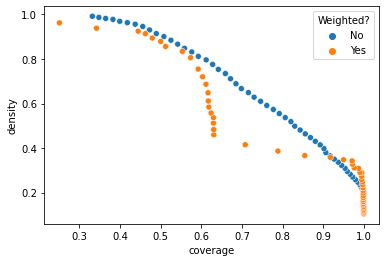

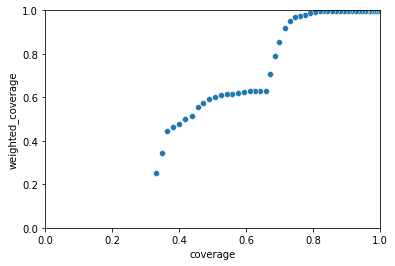

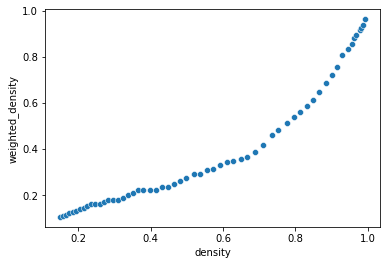

In [26]:
sns.scatterplot(x='coverage', y='density', data=box_to_show, hue='Weighted?')
plt.show()
ax = sns.scatterplot(x='coverage', y='weighted_coverage', data=box1.peeling_trajectory)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()
sns.scatterplot(x='density', y='weighted_density', data=box1.peeling_trajectory)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

In [19]:
box1.peeling_trajectory.tail()

,coverage,density,id,mass,mean,res_dim,box
54,0.399333,0.969256,54,0.0618,0.969256,3,box1_PRIM
55,0.382667,0.977853,55,0.0587,0.977853,3,box1_PRIM
56,0.364667,0.982047,56,0.0557,0.982047,3,box1_PRIM
57,0.348000,0.986767,57,0.0529,0.986767,3,box1_PRIM
58,0.332000,0.992032,58,0.0502,0.992032,3,box1_PRIM


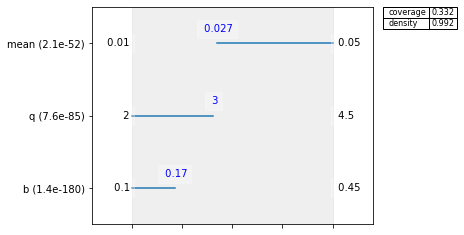

In [20]:
box1.inspect(58, style='graph')
plt.show()

### Check boxes with comparable density and coverage

In [43]:
data = outcomes['max_P']
y = data > np.percentile(data, 80)
# y = data < np.percentile(data, 20)
experiments['y'] = y
print(experiments['y'].sum())

2000


In [44]:
#standard PRIM
prim_alg = prim.Prim(x, y, threshold=0.75)
normal_prim = prim_alg.find_box()

#weighted PRIM
prim_alg = relative_prim.RelativePrim(relative_likelihood=experiments['rel_prob'], x=x, y=y, threshold=0.7)
rel_prim = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 2000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0557, coverage: 0.2785, density: 1.0 restricted_dimensions: 3
[MainProcess/INFO] 10000 points remaining, containing 1651.3223504529078 cases of interest


1651.3223504529078


[MainProcess/INFO] mean: 0.7230340765825607, mass: 0.0502, coverage: 0.7880898655868508, density: 0.7230340765825607 restricted_dimensions: 3


In [45]:
i1 = 30
normal_prim.peeling_trajectory.iloc[i1]

coverage      0.7605
density     0.710748
id                30
mass           0.214
mean        0.710748
res_dim            3
Name: 30, dtype: object

In [46]:
i2 = 57
rel_prim.peeling_trajectory.iloc[i2]

coverage    0.808329
density     0.717462
id                57
mass          0.0529
mean        0.717462
res_dim            3
Name: 57, dtype: object

In [47]:
normal_prim.box_lims[i1]

,b,delta,mean,q
0,0.100012,0.930000,0.018889,2.000021
1,0.247237,0.989999,0.049996,3.645242


In [48]:
rel_prim.box_lims[i2]

,b,delta,mean,q
0,0.100012,0.930000,0.023228,2.799885
1,0.220009,0.989999,0.049996,3.383637


In [49]:
labels = ['Low','Medium','High','Highest']
experiments['likelihood_cat'] = pd.qcut(experiments['rel_prob'], q=[0., 0.25, 0.5, 0.75, 1.], labels=labels)

<AxesSubplot:xlabel='q', ylabel='b'>

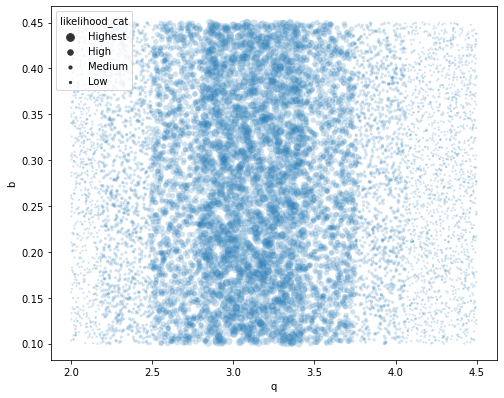

In [50]:
fig, ax = plt.subplots(figsize=(8,6.5))
sns.scatterplot(x='q', y='b', data=experiments, size='likelihood_cat', alpha=0.2, ax=ax, 
                size_order = labels[::-1], sizes=[60,30,10,5])

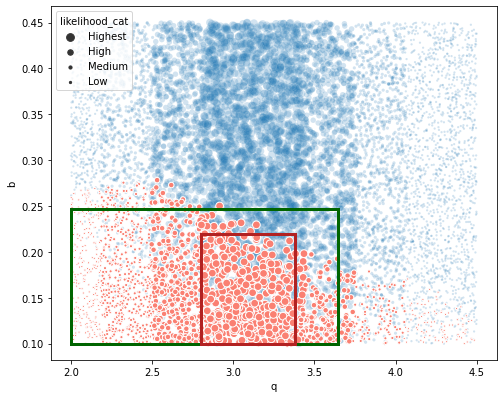

In [54]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(8,6.5))
sns.scatterplot(x='q', y='b', data=experiments.loc[~experiments['y']], size='likelihood_cat', alpha=0.2, ax=ax, 
                size_order = labels[::-1], sizes=[60,30,10,5])
sns.scatterplot(x='q', y='b', data=experiments.loc[experiments['y']], size='likelihood_cat', color='salmon', ax=ax, 
                size_order = labels[::-1], sizes=[60,30,10,5], legend=False, linewidth=1)

#add box
box1_lim = normal_prim.box_lims[i1]
box2_lim = rel_prim.box_lims[i2]
currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((box1_lim.loc[0, 'q'], box1_lim.loc[0, 'b']), 
                                box1_lim.loc[1, 'q'] - box1_lim.loc[0, 'q'], box1_lim.loc[1, 'b'] - box1_lim.loc[0, 'b'],
                                alpha=1, facecolor='none', lw=3, edgecolor='darkgreen'))

currentAxis.add_patch(Rectangle((box2_lim.loc[0, 'q'], box2_lim.loc[0, 'b']), 
                                box2_lim.loc[1, 'q'] - box2_lim.loc[0, 'q'], box2_lim.loc[1, 'b'] - box2_lim.loc[0, 'b'],
                                alpha=1, facecolor='none', lw=3, edgecolor='firebrick'))